In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Fuel Consumption Curve

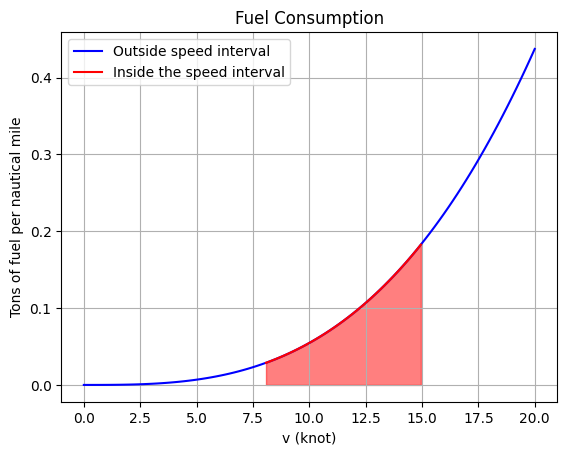

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a vector of velocities
v = np.linspace(0, 20, 100)

# Calculate the function values
fc = (0.15 * (v / 14) ** 3)
# fc = 50 * (v / 14) ** 3

# Create a mask for the interval you want to be red
red_mask = (v >= 8) & (v <= 15)

# Proceed with the plot
plt.plot(v, fc, 'b', label='Outside speed interval')  # Plot the entire curve in blue
plt.plot(v[red_mask], fc[red_mask], 'r', label='Inside the speed interval')  # Plot the red interval in red

# Fill the area under the red interval with a red shade
plt.fill_between(v, fc, where=red_mask, color='red', alpha=0.5)

plt.xlabel('v (knot)')
plt.ylabel('Tons of fuel per nautical mile')
plt.title('Fuel Consumption')
plt.legend()
plt.grid()
plt.show()


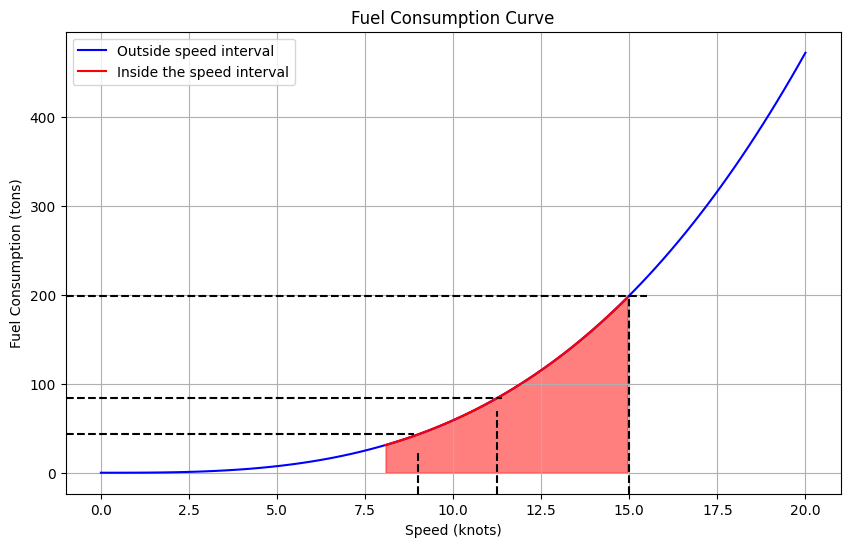

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a vector of velocities
v = np.linspace(0, 20, 100)

# Calculate the function values
fc = (0.15 * (v / 14) ** 3) * 1080

# Create a mask for the interval you want to be red
red_mask = (v >= 8) & (v <= 15)

# Proceed with the plot
plt.figure(figsize=(10, 6))
plt.plot(v, fc, 'b', label='Outside speed interval')  # Plot the entire curve in blue
plt.plot(v[red_mask], fc[red_mask], 'r', label='Inside the speed interval')  # Plot the red interval in red

# Fill the area under the red interval with a red shade
plt.fill_between(v, fc, where=red_mask, color='red', alpha=0.5)

# Speeds of interest
speeds = [9, 11.25, 15]
for speed in speeds:
    # Calculate the corresponding fuel consumption
    fc_value = 0.15 * (speed / 14) ** 3 * 1080
    
    # Plot the vertical line from the x-axis to the curve
    plt.axvline(x=speed, color='k', linestyle='--', ymin=0, ymax=(fc_value / max(fc)))
    
    # Plot the horizontal line from the curve to the y-axis
    plt.axhline(y=fc_value, color='k', linestyle='--', xmin=0, xmax=(speed / max(v)))

# Adding labels and title
plt.xlabel('Speed (knots)')
plt.ylabel('Fuel Consumption (tons)')
plt.title('Fuel Consumption Curve')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
